In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [80]:
def parse(file):
    with open(file,'r') as readFile:                                                                                        #convert lines in file to list
        file = readFile.readlines()

    stop = False
    thermData = []
    thermTime = []
    tCoupData = []
    tCoupTime = []
    countLines = 0
    for i in file:
        if 'DATAQ:' in i and not stop:
            tCoupData.append(float(i.split()[4].strip(',')))
            try:
                    tCoupTime.append(float(file[countLines-1].split()[0].strip('()'))/1000)
                    # totalTime.append(float(file[countLines-1].split()[0].strip('()'))/1000)
            except:
                if file[countLines+1].split()[0] != 'DATAQ:':
                    tCoupTime.append(float(file[countLines+1].split()[0].strip('()'))/1000)
                else:
                    try:
                        tCoupTime.append(float(file[countLines-2].split()[0].strip('()'))/1000)
                    except:
                        try:
                            tCoupTime.append(float(file[countLines+2].split()[0].strip('()'))/1000)
                        except:
                            print(file[countLines])
                            tCoupTime.append(float(file[countLines-3].split()[0].strip('()'))/1000)
        elif 'modeled' in i and not stop:
            thermData.append(float(i.split()[4].strip(',')))
            thermTime.append(float(i.split()[0].strip('()'))/1000)
            if float(i.split()[4].strip(',')) > 114:
                stop = True
        
        countLines += 1
    thermTime = np.array(thermTime)-thermTime[0]
    tCoupTime = np.array(tCoupTime)-tCoupTime[0]
    return (thermTime,thermData),(tCoupTime,tCoupData)
def r2(y,fit):
    y = np.array(y)
    fit = np.array(fit)
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

def test(x,a,b,c):
    return a*np.log(x+b)+c

In [81]:
file = 'data/JW_mod4_tcInMiddle_1.txt'
file2 = 'data/JW_mod4_tcInMiddleWithCupFail_2.txt'
file3 = 'data/JW_mod4_tcInSide_3.txt'

x1,y1 = parse(file)[0]
x2,y2 = parse(file)[1]

x3,y3 = parse(file2)[0]
x4,y4 = parse(file2)[1]

x5,y5 = parse(file3)[0]
x6,y6 = parse(file3)[1]

[  84.40359326    8.11522572 -152.81500366] 
 [  551.12074805   184.93141904 -2848.07427584]


C:\Users\JoshWhitehead\AppData\Local\Temp\ipykernel_7224\2268326598.py:48: RuntimeWarning: invalid value encountered in log
  return a*np.log(x+b)+c


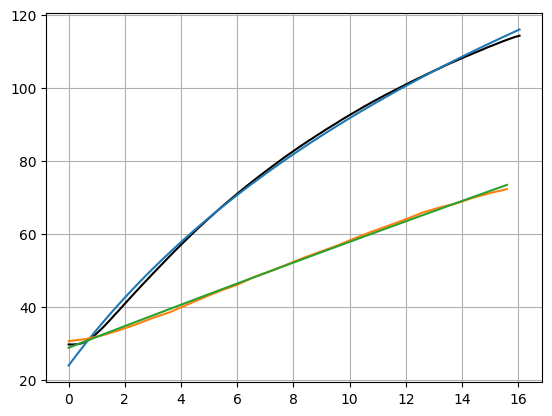

In [82]:
pop1,pcov1 = curve_fit(test,x1,y1)
pop2,pcov2 = curve_fit(test,x2,y2)

plt.plot(x1,y1,color='k')
plt.plot(x1,test(x1,*pop1))
plt.plot(x2,y2)
plt.plot(x2,test(x2,*pop2))
plt.grid()
print(pop1,'\n',pop2)

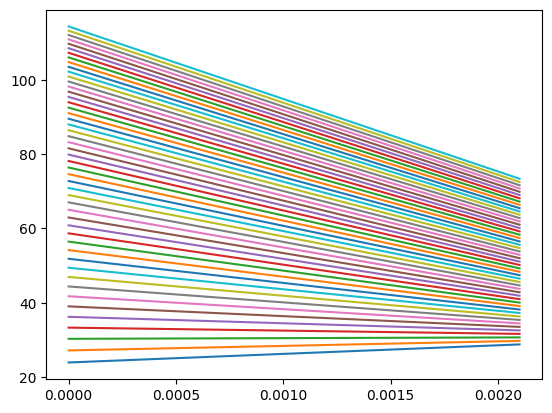

In [ ]:
x0 = interp1d(x1,test(x1,*pop1))
xL = interp1d(x2,test(x2,*pop2))

times = np.linspace(0,x2[-1])
dist = np.linspace(0,0.0021)
Tx = []
params = []
for i in times:
    a,b = np.polyfit([0,.0021],[x0(i),xL(i)],1)
    Tx.append(a*dist+b)
    params.append((a,b))
for i in Tx:
    plt.plot(dist,i)

params = np.array(params).T





[   -3.97822202   178.79009564 -3217.18789485  2125.83781968]


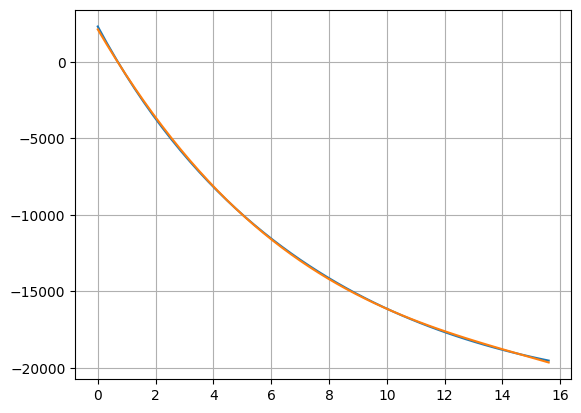

In [ ]:
def test2(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
popA,pcovA = curve_fit(test2,times,params[0])
plt.plot(times,params[0])
plt.plot(times,test2(times,*popA))
plt.grid()
print(popA)

[ 8.37991545e-03 -3.83481875e-01  9.73609947e+00  2.43031966e+01]


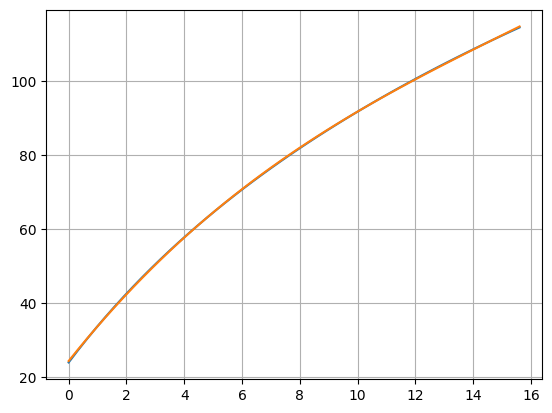

In [ ]:
def test3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
popB,pcovB = curve_fit(test3,times,params[1])
plt.plot(times,params[1])
plt.plot(times,test3(times,*popB))
plt.grid()
print(popB)

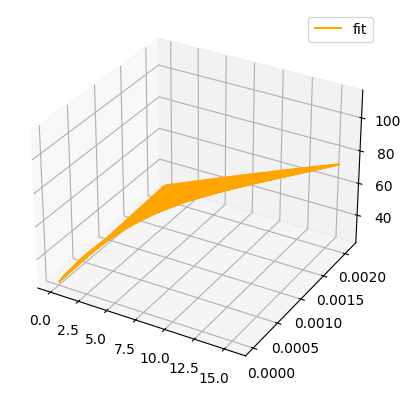